In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv(r"C:\Users\takue\Documents\Data Science\Super Store\Sample Superstore - Orders.csv")
df.head()

,Order Priority,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Region,State or Province,City,Order Date,Ship Date,Quantity,Order ID
0,Not Specified,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,Central,Illinois,Addison,28/05/2012,30/05/2012,2,88525
1,High,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,West,Washington,Anacortes,07/07/2010,08/07/2010,4,88522
2,Not Specified,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,Small Box,Xerox 1968,West,Washington,Anacortes,27/07/2011,28/07/2011,7,88523
3,Not Specified,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Small Pack,Acme® Preferred Stainless Steel Scissors,West,Washington,Anacortes,27/07/2011,28/07/2011,7,88523
4,Not Specified,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,Telephones and Communication,Small Box,V70,West,Washington,Anacortes,27/07/2011,27/07/2011,8,88523


In [25]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', yearfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce', yearfirst=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order Priority        9426 non-null   object        
 1   Unit Price            9426 non-null   float64       
 2   Shipping Cost         9426 non-null   float64       
 3   Customer ID           9426 non-null   int64         
 4   Customer Name         9426 non-null   object        
 5   Ship Mode             9426 non-null   object        
 6   Customer Segment      9426 non-null   object        
 7   Product Category      9426 non-null   object        
 8   Product Sub-Category  9426 non-null   object        
 9   Product Container     9426 non-null   object        
 10  Product Name          9426 non-null   object        
 11  Region                9426 non-null   object        
 12  State or Province     9426 non-null   object        
 13  City              

In [27]:
df['SalesAmountWithShipping'] = df['Unit Price'] * df['Quantity '] + df['Shipping Cost']
product_data = df[['Product Name', 'Order Date', 'SalesAmountWithShipping']]
product_data['Year'] = product_data['Order Date'].dt.year
product_data['Month'] = product_data['Order Date'].dt.month_name()
product_data

,Product Name,Order Date,SalesAmountWithShipping,Year,Month
0,Avery 49,2012-05-28,6.26,2012,May
1,SANFORD Liquid Accent™ Tank-Style Highlighters,2010-07-07,12.29,2010,July
2,Xerox 1968,2011-07-27,52.91,2011,July
3,Acme® Preferred Stainless Steel Scissors,2011-07-27,43.36,2011,July
4,V70,2011-07-27,1650.42,2011,July
...,...,...,...,...,...
9421,Jet-Pak Recycled Peel 'N' Seal Padded Mailers,2013-05-14,481.29,2013,May
9422,"Eldon Spacemaker® Box, Quick-Snap Lid, Clear",2013-05-14,17.51,2013,May
9423,Chromcraft Bull-Nose Wood Oval Conference Tabl...,2013-09-12,2249.62,2013,September
9424,"Tenex 46"" x 60"" Computer Anti-Static Chairmat,...",2010-02-08,543.89,2010,February


In [28]:
# Group data by Product Name and Year, then sum Sales
grouped_products = (product_data.groupby(by=['Product Name', 'Year'])['SalesAmountWithShipping']
                    .sum()
                    .reset_index())
grouped_products

,Product Name,Year,SalesAmountWithShipping
0,"""While you Were Out"" Message Book, One Form pe...",2010,42.74
1,"""While you Were Out"" Message Book, One Form pe...",2011,176.45
2,"""While you Were Out"" Message Book, One Form pe...",2012,52.09
3,#10 Self-Seal White Envelopes,2011,287.75
4,#10 Self-Seal White Envelopes,2012,227.05
...,...,...,...
3881,iDEN i95,2011,567.90
3882,iDEN i95,2012,1273.80
3883,iDEN i95,2013,1669.74
3884,iDENi80s,2011,4943.23


In [33]:
# Group by 'Product Name' and calculate CAGR
def compute_cagr(group):
    initial_year = group['Year'].min()
    final_year = group['Year'].max()
    
    starting_value = group.loc[group['Year'] == initial_year, 'SalesAmountWithShipping'].values[0]
    ending_value = group.loc[group['Year'] == final_year, 'SalesAmountWithShipping'].values[0]
    
    t = final_year - initial_year
    
    # Avoid division by zero if there is only one year
    if t == 0:
        return 0
       
    return (ending_value / starting_value) ** (1 / t) - 1

# Apply function to each product
cagr_of_products = grouped_products.groupby('Product Name').apply(compute_cagr)

cagr_of_products = cagr_of_products.reset_index().rename(columns={0: 'CAGR'})

cagr_of_products


,Product Name,CAGR
0,"""While you Were Out"" Message Book, One Form pe...",0.103977
1,#10 Self-Seal White Envelopes,0.092109
2,"#10 White Business Envelopes,4 1/8 x 9 1/2",-0.045078
3,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",0.750247
4,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",-0.399918
...,...,...
1258,i500plus,0.000000
1259,i600,-0.086412
1260,iDEN i550,0.000000
1261,iDEN i95,0.714701


In [38]:
total_sales = grouped_products['SalesAmountWithShipping'].sum()
grouped_sales = (product_data.groupby(by=['Product Name'])['SalesAmountWithShipping']
                    .sum()
                    .reset_index())
grouped_sales['MarketShare'] = (grouped_products['SalesAmountWithShipping'] / total_sales) * 100
grouped_sales.sort_values(by='MarketShare', ascending=False)

,Product Name,SalesAmountWithShipping,MarketShare
989,Staples Plastic Wall Frames,2085.27,0.675359
1000,StarTAC 6500,20272.80,0.669002
894,Riverside Furniture Stanwyck Manor Table Series,31535.64,0.646343
891,Regeneration Desk Collection,174.82,0.607134
1035,Talkabout T8367,16047.43,0.575000
...,...,...,...
643,"Howard Miller 16"" Diameter Gallery Wall Clock",9032.46,0.000059
337,Chromcraft Bull-Nose Wood Round Conference Tab...,21959.60,0.000053
578,Hayes Optima 56K V.90 Internal Voice Modem,17017.59,0.000044
593,Holmes 99% HEPA Air Purifier,2618.16,0.000036


In [39]:
# Relative market share 
grouped_sales['RelativeMarketShare'] = grouped_sales['MarketShare'] / grouped_sales['MarketShare'].max()
grouped_sales.sort_values(by='MarketShare', ascending=False)

,Product Name,SalesAmountWithShipping,MarketShare,RelativeMarketShare
989,Staples Plastic Wall Frames,2085.27,0.675359,1.000000
1000,StarTAC 6500,20272.80,0.669002,0.990587
894,Riverside Furniture Stanwyck Manor Table Series,31535.64,0.646343,0.957036
891,Regeneration Desk Collection,174.82,0.607134,0.898979
1035,Talkabout T8367,16047.43,0.575000,0.851400
...,...,...,...,...
643,"Howard Miller 16"" Diameter Gallery Wall Clock",9032.46,0.000059,0.000087
337,Chromcraft Bull-Nose Wood Round Conference Tab...,21959.60,0.000053,0.000078
578,Hayes Optima 56K V.90 Internal Voice Modem,17017.59,0.000044,0.000066
593,Holmes 99% HEPA Air Purifier,2618.16,0.000036,0.000053


In [42]:
# Merge CAGR and Market Share data into a single DataFrame (Boston Matrix)
boston_matrix_data = grouped_sales.merge(cagr_of_products, on='Product Name', how='inner')

boston_matrix_data


,Product Name,SalesAmountWithShipping,MarketShare,RelativeMarketShare,CAGR
0,"""While you Were Out"" Message Book, One Form pe...",271.28,0.000454,0.000672,0.103977
1,#10 Self-Seal White Envelopes,858.00,0.001872,0.002772,0.092109
2,"#10 White Business Envelopes,4 1/8 x 9 1/2",2887.07,0.000553,0.000818,-0.045078
3,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",1958.86,0.003053,0.004521,0.750247
4,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",883.47,0.002409,0.003567,-0.399918
...,...,...,...,...,...
1258,i500plus,2783.42,0.001399,0.002071,0.000000
1259,i600,1529.85,0.001744,0.002583,-0.086412
1260,iDEN i550,13635.32,0.010380,0.015370,0.000000
1261,iDEN i95,3511.44,0.000958,0.001418,0.714701


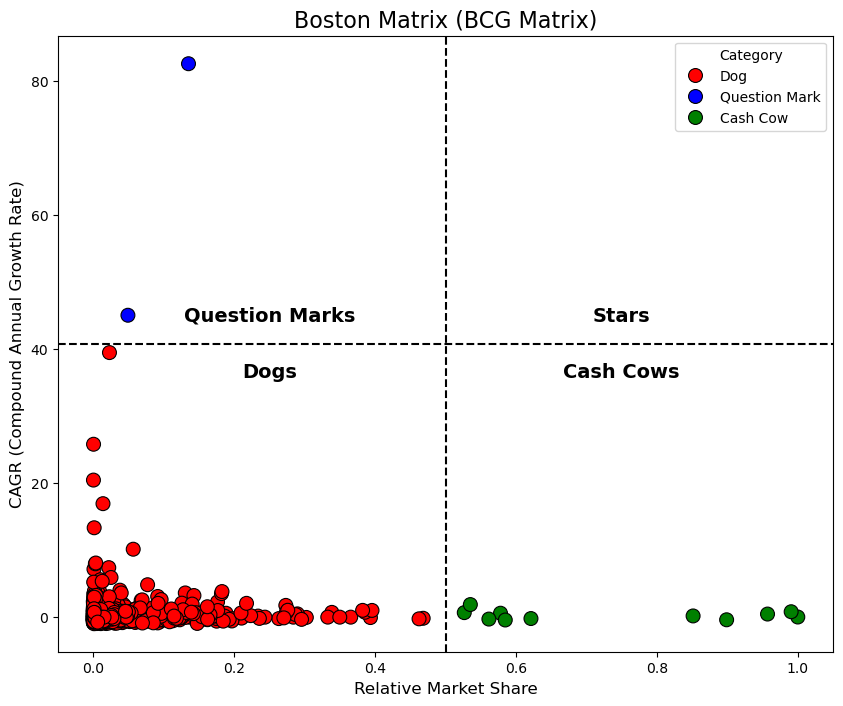

In [51]:
# Classifying products into the BCG Matrix categories
# Get the midpoint of the CAGR axis
cagr_min = boston_matrix_data['CAGR'].min()
cagr_max = boston_matrix_data['CAGR'].max()
cagr_mid = (cagr_min + cagr_max) / 2

def classify_product(row):
    if row['RelativeMarketShare'] > 0.5 and row['CAGR'] > cagr_mid:
        return 'Star'
    elif row['RelativeMarketShare'] > 0.5 and row['CAGR'] <= cagr_mid:
        return 'Cash Cow'
    elif row['RelativeMarketShare'] <= 0.5 and row['CAGR'] > cagr_mid:
        return 'Question Mark'
    else:
        return 'Dog'

# Apply classification function
boston_matrix_data['Category'] = boston_matrix_data.apply(classify_product, axis=1)

# Plotting the BCG Matrix
plt.figure(figsize=(10, 8))

# Define color mapping for different categories
category_colors = {
    'Star': 'gold', 
    'Cash Cow': 'green', 
    'Question Mark': 'blue', 
    'Dog': 'red'
}

# Scatter plot
sns.scatterplot(data=boston_matrix_data, x='RelativeMarketShare', y='CAGR', hue='Category', 
                palette=category_colors, s=100, edgecolor='black')

# Adding labels and title
plt.title('Boston Matrix (BCG Matrix)', fontsize=16)
plt.xlabel('Relative Market Share', fontsize=12)
plt.ylabel('CAGR (Compound Annual Growth Rate)', fontsize=12)

# Draw lines to create quadrants (the Boston Matrix boundaries)
plt.axvline(x=0.5, color='black', linestyle='--')  # Vertical line for Relative Market Share = 0.5
plt.axhline(y=cagr_mid, color='black', linestyle='--')  # Horizontal line for midpoint of CAGR values

# Adding quadrant labels
plt.text(0.25, cagr_mid + (cagr_max - cagr_min) * 0.05, 'Question Marks', ha='center', va='center', fontsize=14, fontweight='bold')
plt.text(0.75, cagr_mid + (cagr_max - cagr_min) * 0.05, 'Stars', ha='center', va='center', fontsize=14, fontweight='bold')
plt.text(0.25, cagr_mid - (cagr_max - cagr_min) * 0.05, 'Dogs', ha='center', va='center', fontsize=14, fontweight='bold')
plt.text(0.75, cagr_mid - (cagr_max - cagr_min) * 0.05, 'Cash Cows', ha='center', va='center', fontsize=14, fontweight='bold')

# Show the plot
plt.show()


In [52]:
boston_matrix_data.to_csv(r'C:\Users\takue\Documents\Data Science\Super Store\new datasets\boston_matrix_data.csv')